In [1]:
from wand.image import Image as WImage

In [2]:
import numpy as np
import pandas as pd

In [158]:
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

In [108]:
import matplotlib.colors as colors

In [4]:
mpl.use('pdf')

In [5]:
# Load style file
pyplot.style.use('PaperDoubleFig.mplstyle')

In [6]:
pyplot.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

In [7]:
# Make some style choices for plotting
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

In [8]:
aps_column_width = 3.404 # inches
golden_ratio = 1.618

width = aps_column_width
height = aps_column_width / golden_ratio

screen_dpi = 123 # pixels / inch

In [9]:
df = pd.read_pickle('../dataframe.pkl')

In [10]:
lower = df['energy'] >= 0.1
upper = df['energy'] <= 30
both = lower & upper
df2 = df[both]

In [11]:
df3 = df2.sort_values(by=['neutron_number', 'energy'], ascending=[True, True])

In [12]:
df4 = df3[df3['temperature'] == 0.0]

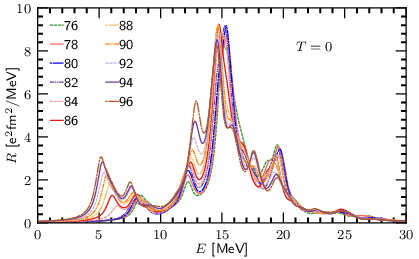

In [13]:
pyplot.close('all')
fig, ax = pyplot.subplots()
fig.subplots_adjust(left=.09, bottom=.14, right=.97, top=.97)
dy = 0
for j, neutron_number in enumerate(df4.neutron_number.unique()):
    isotope = df4.neutron_number == neutron_number
    mydf = df4[isotope]
    ax.plot(mydf.energy, mydf.strength_function + j * dy,
            color=colourWheel[j%len(colourWheel)],
            linestyle = '-',
            dashes=dashesStyles[j%len(dashesStyles)],
            label=neutron_number
)

ax.set_ylabel(r"$R$ [e${}^{2}$fm${}^{2}$/MeV]", labelpad=-2)
ax.set_xlabel(r"$E$ [MeV]", labelpad=--0.5)
ax.set_xlim(0.1, 30)
ax.set_ylim(0, 10)

ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
# ax.yaxis.set_label_coords(0.63,1.01)
ax.legend(loc='upper left', ncol=2, handlelength=1)
ax.annotate(s=r"$T = 0$", xy=(0.7,0.8), xycoords="axes fraction")

fig.set_size_inches(width, height)
fig.savefig('plot.pdf')  # facecolor='C7'
img = WImage(filename='plot.pdf', resolution=screen_dpi)
img

In [24]:
df5 = df4[df4.neutron_number == 76]
nenergy = df5.energy.size
print(f"Number of energy grid points: {nenergy}")

Number of energy grid points: 2991


In [ ]:
x = np.empty(nenergy)
x = df5.energy

In [137]:
all_temperatures = np.sort(df3.temperature.unique())
print(f"All temperatures: {all_temperatures}")

All temperatures: [0.  0.5 1.  2. ]


In [138]:
def all_strength_functions_for_temperature(temperature, df, nenergy):
  
    all_neutron_numbers = df.neutron_number.unique()
    nisotopes = len(all_neutron_numbers)
    
    df2 = df[df['temperature'] == temperature]
    
    y = np.empty((nisotopes, nenergy))
    
    for j, neutron_number in enumerate(all_neutron_numbers):
        isotope = (df2.neutron_number == neutron_number)
        isodf = df2[isotope]
        y[j,:] = isodf.strength_function
    return y

In [145]:
list(range(76,96 + 2,2))

[76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96]

In [171]:
np.flip(all_temperatures)

array([2. , 1. , 0.5, 0. ])

In [175]:
x

35017     0.10
35018     0.11
35019     0.12
35020     0.13
35021     0.14
         ...  
38003    29.96
38004    29.97
38005    29.98
38006    29.99
38007    30.00
Name: energy, Length: 2991, dtype: float64

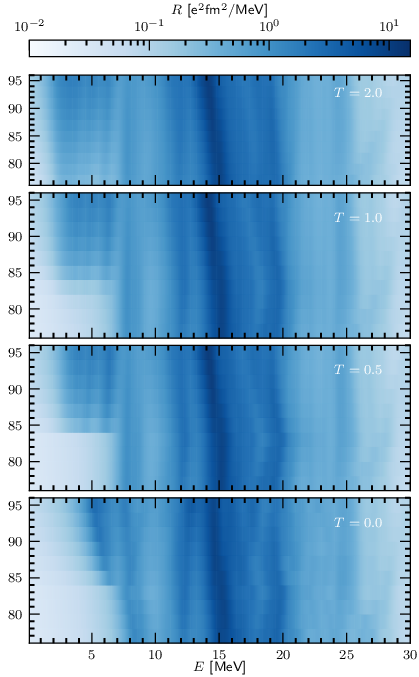

In [189]:
pyplot.close('all')
fig, axarr = pyplot.subplots(4, 1, squeeze=False)
axes = {str(temp): ax for temp, ax in zip(np.flip(all_temperatures), axarr.flat)}

fig.subplots_adjust(left=.07, bottom=.05, right=.98, top=.94, hspace=.05)

for temp in all_temperatures:
    ax = axes[str(temp)]
    y = all_strength_functions_for_temperature(temp, df3, nenergy)
    mappable = ax.pcolormesh(x, range(76, 96 + 2, 2), y, norm=colors.LogNorm(vmin=0.01, vmax=15.0), cmap="Blues")  # norm=colors.LogNorm(vmin=0.2, vmax=5.0)
    ax.annotate(s=f"$T = {temp}$", xy=(0.8,0.8), xycoords="axes fraction", color="w")
    
    if temp == 2.0:
            divider = make_axes_locatable(axes=ax)
            cax = divider.append_axes(position="top", size="15%", pad=0.15)
            cb = ax.figure.colorbar(mappable=mappable, cax=cax, orientation="horizontal")
            cb.set_label(r"$R$ [e${}^{2}$fm${}^{2}$/MeV]")
            cb.ax.xaxis.set_ticks_position('top')
            cb.ax.xaxis.set_label_position('top')

for ax in axarr[:-1].flat:
    ax.set_xticklabels([])

for ax in axarr.flat:
#     ax.set_yticklabels([76, 80, 90, 96])
#     ax.set_yticks([76, 80, 90, 96])
    ax.set_xlim(0.1, 30)
    
axes['0.0'].set_xlabel(r"$E$ [MeV]", labelpad=-0.5)

fig.set_figwidth(width)  # width
fig.set_figheight(width * golden_ratio) ##
fig.savefig('colormesh.pdf')  # facecolor='C7'
img = WImage(filename='colormesh.pdf', resolution=screen_dpi)
img